Checkers Class

In [9]:
import math
from array import *
from copy import deepcopy
from functools import partial
import numpy as np

class checkers:
    
    # Player pieces are denoted 1 (pawn) and 2 (king), opponents are negative
    def __init__(self, player = 1, position = [1] * 12 + [0] * 8 + [-1] * 12):
        
        if player == 1:
            self.position = position
        else:
            self.position = [-position[31-i] for i in range(32)]
            
        self.pawns = []
        self.kings = []
        self.epawns = []
        self.ekings = []
        
        self.type = "all"
        self.actions = []
        
        self.win = 0
        self.winMove = []
        self.notlMove = []
        self.optimalActions = []
        
    # Find location and count of all pieces
    def updateLocation(self):
        
        pawns = []
        kings = []
        epawns = []
        ekings = []
        
        for index, piece in enumerate(self.position):
            if piece == 1:
                pawns.append(index)
            elif piece == 2:
                kings.append(index)
            elif piece == -1:
                epawns.append(index)
            elif piece == -2:
                ekings.append(index)
        
        self.pawns = pawns
        self.kings = kings
        self.epawns = epawns
        self.ekings = ekings
        
    # Find all possible actions
    def actions(pawns, kings, epawns, ekings, key):
        
        # Whenever a branch is made, the input will be in the form [piece size (1/2), location of piece moved, piece jumped over, ending location]
        jumps = []
        
        # jumps have length 4, regular moves have length 3
        moves = []
        
        if key == None:
            
            # Check if a pawn jump can be made
            for location in pawns:
                
                if (location // 4) % 2 == 0:
                    
                    if location % 4 in [0,1,2]:
                        
                        if (((location + 5) in epawns) or ((location + 5) in ekings)) and (not (((location + 9) in epawns) or ((location + 9) in ekings) or ((location + 9) in pawns) or ((location + 9) in kings))) and (location + 9 < 32):
                                                    
                            jumps.append([1, location, 5, 9])
                        
                    if location % 4 in [1,2,3]:
                        
                        if (((location + 4) in epawns) or ((location + 4) in ekings)) and (not (((location + 7) in epawns) or ((location + 7) in ekings) or ((location + 7) in pawns) or ((location + 7) in kings))) and (location + 7 < 32):
                                                    
                            jumps.append([1, location, 4, 7])

                else:
                    
                    if location % 4 in [0,1,2]:
                        
                        if (((location + 4) in epawns) or ((location + 4) in ekings)) and (not (((location + 9) in epawns) or ((location + 9) in ekings)) or ((location + 9) in pawns) or ((location + 9) in kings)) and (location + 9 < 32):
                                                    
                            jumps.append([1, location, 4, 9])
                        
                    if location % 4 in [1,2,3]:
                        
                        if (((location + 3) in epawns) or ((location + 3) in ekings)) and (not (((location + 7) in epawns) or ((location + 7) in ekings) or ((location + 7) in pawns) or ((location + 7) in kings))) and (location + 7 < 32):
                                                    
                            jumps.append([1, location, 3, 7])

            # Check if a king jump can be made
            for location in kings:
                    
                if (location // 4) % 2 == 0:
                    
                    if location % 4 in [0,1,2]:
                        
                        if (((location + 5) in epawns) or ((location + 5) in ekings)) and (not (((location + 9) in epawns) or ((location + 9) in ekings) or ((location + 9) in pawns) or ((location + 9) in kings))) and (location + 9 < 32):
                                                    
                            jumps.append([2, location, 5, 9])
                        
                        if (((location - 3) in epawns) or ((location - 3) in ekings)) and (not (((location - 7) in epawns) or ((location - 7) in ekings) or ((location - 7) in pawns) or ((location - 7) in kings))) and (location - 7 >= 0):
                                                    
                            jumps.append([2, location, -3, -7])
                        
                    if location % 4 in [1,2,3]:
                        
                        if (((location + 4) in epawns) or ((location + 4) in ekings)) and (not (((location + 7) in epawns) or ((location + 7) in ekings) or ((location + 7) in pawns) or ((location + 7) in kings))) and (location + 7 < 32):
                                                    
                            jumps.append([2, location, 4, 7])

                        if (((location - 4) in epawns) or ((location - 4) in ekings)) and (not (((location - 9) in epawns) or ((location - 9) in ekings) or ((location - 9) in pawns) or ((location - 9) in kings))) and (location - 9 >= 0):
                                                    
                            jumps.append([2, location, -4, -9])
                            
                else:
                    
                    if location % 4 in [0,1,2]:
                        
                        if (((location + 4) in epawns) or ((location + 4) in ekings)) and (not (((location + 9) in epawns) or ((location + 9) in ekings) or ((location + 9) in pawns) or ((location + 9) in kings))) and (location + 9 < 32):
                                                    
                            jumps.append([2, location, 4, 9])

                        if (((location - 4) in epawns) or ((location - 4) in ekings)) and (not (((location - 7) in epawns) or ((location - 7) in ekings) or ((location - 7) in pawns) or ((location - 7) in kings))) and (location - 7 >= 0):
                                                    
                            jumps.append([2, location, -4, -7])
                        
                    if location % 4 in [1,2,3]:
                        
                        if (((location + 3) in epawns) or ((location + 3) in ekings)) and (not (((location + 7) in epawns) or ((location + 7) in ekings) or ((location + 7) in pawns) or ((location + 7) in kings))) and (location + 7 < 32):
                                                    
                            jumps.append([2, location, 3, 7])
                            
                        if (((location - 5) in epawns) or ((location - 5) in ekings)) and (not (((location - 9) in epawns) or ((location - 9) in ekings) or ((location - 9) in pawns) or ((location - 9) in kings))) and (location - 9 >= 0):
                                                    
                            jumps.append([2, location, -5, -9])
                            
            # If a jump can be made:
            if len(jumps) > 0:
                
                for jump in jumps:
                    
                    # If the jump promotes the pawn
                    if jump[0] == 1 and (jump[1] + jump[3]) // 4 == 7:
                        
                        moves.append([jump])
                    
                    else:
                        
                        newpawns = deepcopy(pawns)
                        newkings = deepcopy(kings)
                        newepawns = deepcopy(epawns)
                        newekings = deepcopy(ekings)
                        
                        if jump[0] == 1:                            
                            newpawns.remove(jump[1])
                        else:
                            newkings.remove(jump[1])

                        if (jump[1] + jump[2]) in epawns:
                            newepawns.remove(jump[1] + jump[2])
                        
                        else:
                            newekings.remove(jump[1] + jump[2])
                                
                        if jump[0] == 1:
                            newpawns.append(jump[1] + jump[3])
                        else:
                            newkings.append(jump[1] + jump[3])
                        
                        key = jump[1] + jump[3]
                        
                        newactions = checkers.actions(newpawns, newkings, newepawns, newekings, key)
                        moves += [[jump] + action for action in newactions]
                        
            # No jumps, so only normal moves
            else:
                
                # Check if a pawn step can be made
                for location in pawns:
                    
                    if (location // 4) % 2 == 0:
                        
                        if location % 4 in [0,1,2]:
                            
                            if not (((location + 5) in epawns) or ((location + 5) in ekings) or ((location + 5) in pawns) or ((location + 5) in kings)) and (location + 5 < 32):
                                                        
                                moves.append([[1, location, 5], [""]])
                            
                        if location % 4 in [0,1,2,3]:
                            
                            if not (((location + 4) in epawns) or ((location + 4) in ekings) or ((location + 4) in pawns) or ((location + 4) in kings)) and (location + 4 < 32):
                                                        
                                moves.append([[1, location, 4], [""]])

                    else:
                        
                        if location % 4 in [0,1,2,3]:
                            
                            if not (((location + 4) in epawns) or ((location + 4) in ekings) or ((location + 4) in pawns) or ((location + 4) in kings)) and (location + 4 < 32):
                                                        
                                moves.append([[1, location, 4], [""]])
                            
                        if location % 4 in [1,2,3]:
                            
                            if not (((location + 3) in epawns) or ((location + 3) in ekings) or ((location + 3) in pawns) or ((location + 3) in kings)) and (location + 3 < 32):
                                                        
                                moves.append([[1, location, 3], [""]])

                # Check if a king step can be made
                for location in kings:
                        
                    if (location // 4) % 2 == 0:
                        
                        if location % 4 in [0,1,2]:
                            
                            if not (((location + 5) in epawns) or ((location + 5) in ekings) or ((location + 5) in pawns) or ((location + 5) in kings)) and (location + 5 < 32):
                                                        
                                moves.append([[2, location, 5], [""]])

                            if not (((location - 3) in epawns) or ((location - 3) in ekings) or ((location - 3) in pawns) or ((location - 3) in kings)) and (location - 3 >= 0):
                                                        
                                moves.append([[2, location, -3], [""]])
                                
                        if location % 4 in [0,1,2,3]:
                            
                            if not (((location + 4) in epawns) or ((location + 4) in ekings) or ((location + 4) in pawns) or ((location + 4) in kings)) and (location + 4 < 32):
                                                        
                                moves.append([[2, location, 4], [""]])
                            
                            if not (((location - 4) in epawns) or ((location - 4) in ekings) or ((location - 4) in pawns) or ((location - 4) in kings)) and (location - 4 >= 0):
                                                        
                                moves.append([[2, location, -4], [""]])
                                
                    else:
                        
                        if location % 4 in [0,1,2,3]:
                            
                            if not (((location + 4) in epawns) or ((location + 4) in ekings) or ((location + 4) in pawns) or ((location + 4) in kings)) and (location + 4 < 32):
                                                        
                                moves.append([[2, location, 4], [""]])

                            if not (((location - 4) in epawns) or ((location - 4) in ekings) or ((location - 4) in pawns) or ((location - 4) in kings)) and (location - 4 >= 0):
                                                        
                                moves.append([[2, location, -4], [""]])

                            
                        if location % 4 in [1,2,3]:
                            
                            if not (((location + 3) in epawns) or ((location + 3) in ekings) or ((location + 3) in pawns) or ((location + 3) in kings)) and (location + 3 < 32):
                                                        
                                moves.append([[2, location, 3], [""]])

                            if not (((location - 5) in epawns) or ((location - 5) in ekings) or ((location - 5) in pawns) or ((location - 5) in kings)) and (location - 5 >= 0):
                                                        
                                moves.append([[2, location, -5], [""]])

        # There was a previous jump
        else:
            
            if key in pawns:
                                
                if (key // 4) % 2 == 0:
                    
                    if key % 4 in [0,1,2]:
                        
                        if (((key + 5) in epawns) or ((key + 5) in ekings)) and (not (((key + 9) in epawns) or ((key + 9) in ekings) or ((key + 9) in pawns) or ((key + 9) in kings))) and (key + 9 < 32):
                                                    
                            jumps.append([1, key, 5, 9])
                        
                    if key % 4 in [1,2,3]:
                        
                        if (((key + 4) in epawns) or ((key + 4) in ekings)) and (not (((key + 7) in epawns) or ((key + 7) in ekings) or ((key + 7) in pawns) or ((key + 7) in kings))) and (key + 7 < 32):
                                                    
                            jumps.append([1, key, 4, 7])

                else:
                    
                    if key % 4 in [0,1,2]:
                        
                        if (((key + 4) in epawns) or ((key + 4) in ekings)) and (not (((key + 9) in epawns) or ((key + 9) in ekings) or ((key + 9) in pawns) or ((key + 9) in kings))) and (key + 9 < 32):
                                                    
                            jumps.append([1, key, 4, 9])
                        
                    if key % 4 in [1,2,3]:
                        
                        if (((key + 3) in epawns) or ((key + 3) in ekings)) and (not (((key + 7) in epawns) or ((key + 7) in ekings) or ((key + 7) in pawns) or ((key + 7) in kings))) and (key + 7 < 32):
                                                    
                            jumps.append([1, key, 3, 7])

            # Check if a king jump can be made
            if key in kings:
                    
                if (key // 4) % 2 == 0:
                    
                    if key % 4 in [0,1,2]:
                        
                        if (((key + 5) in epawns) or ((key + 5) in ekings)) and (not (((key + 9) in epawns) or ((key + 9) in ekings) or ((key + 9) in pawns) or ((key + 9) in kings))) and (key + 9 < 32):
                                                    
                            jumps.append([2, key, 5, 9])
                        
                        if (((key - 3) in epawns) or ((key - 3) in ekings)) and (not (((key - 7) in epawns) or ((key - 7) in ekings) or ((key - 7) in pawns) or ((key - 7) in kings))) and (key - 7 >= 0):
                                                    
                            jumps.append([2, key, -3, -7])
                        
                    if key % 4 in [1,2,3]:
                        
                        if (((key + 4) in epawns) or ((key + 4) in ekings)) and (not (((key + 7) in epawns) or ((key + 7) in ekings) or ((key + 7) in pawns) or ((key + 7) in kings))) and (key + 7 < 32):
                                                    
                            jumps.append([2, key, 4, 7])
                        
                        if (((key - 4) in epawns) or ((key - 4) in ekings)) and (not (((key - 9) in epawns) or ((key - 9) in ekings) or ((key - 9) in pawns) or ((key - 9) in kings))) and (key - 9 >= 0):
                                                    
                            jumps.append([2, key, -4, -9])
                            
                else:
                    
                    if key % 4 in [0,1,2]:
                        
                        if (((key + 4) in epawns) or ((key + 4) in ekings)) and (not (((key + 9) in epawns) or ((key + 9) in ekings) or ((key + 9) in pawns) or ((key + 9) in kings))) and (key + 9 < 32):
                                                    
                            jumps.append([2, key, 4, 9])
                        
                        if (((key - 4) in epawns) or ((key - 4) in ekings)) and (not (((key - 7) in epawns) or ((key - 7) in ekings) or ((key - 7) in pawns) or ((key - 7) in kings))) and (key - 7 >= 0):
                                                    
                            jumps.append([2, key, -4, -7])
                        
                    if key % 4 in [1,2,3]:
                        
                        if (((key + 3) in epawns) or ((key + 3) in ekings)) and (not (((key + 7) in epawns) or ((key + 7) in ekings) or ((key + 7) in pawns) or ((key + 7) in kings))) and (key + 7 < 32):
                                                    
                            jumps.append([2, key, 3, 7])

                        if (((key - 5) in epawns) or ((key - 5) in ekings)) and (not (((key - 9) in epawns) or ((key - 9) in ekings) or ((key - 9) in pawns) or ((key - 9) in kings))) and (key - 9 >= 0):
                                                    
                            jumps.append([2, key, -5, -9])
                                         
            if len(jumps) > 0:
                
                for jump in jumps:
                    
                    # If the jump promotes the pawn
                    if jump[0] == 1 and (jump[1] + jump[3]) // 4 == 7:
                        
                        moves.append([jump])
                    
                    else:
                        
                        newpawns = deepcopy(pawns)
                        newkings = deepcopy(kings)
                        newepawns = deepcopy(epawns)
                        newekings = deepcopy(ekings)
                        
                        if jump[0] == 1:                            
                            newpawns.remove(jump[1])
                        else:
                            newkings.remove(jump[1])

                        if (jump[1] + jump[2]) in epawns:
                            newepawns.remove(jump[1] + jump[2])
                        
                        else:
                            newekings.remove(jump[1] + jump[2])
                                
                        if jump[0] == 1:
                            newpawns.append(jump[1] + jump[3])
                        else:
                            newkings.append(jump[1] + jump[3])
                        
                        key = jump[1] + jump[3]
                        
                        newactions = checkers.actions(newpawns, newkings, newepawns, newekings, key)
                        moves += [[jump] + action for action in newactions]
        
        if len(moves) == 0:
            moves = [[[""]]]
        
        return(moves)

    # Update actions with actions()
    def updateActions(self):
        self.updateLocation()
        self.actions = checkers.actions(self.pawns, self.kings, self.epawns, self.ekings, None)
    
    def opponentAction(self):
        
        fpawns = [31-i for i in self.epawns]
        fkings = [31-i for i in self.ekings]
        fepawns = [31-i for i in self.pawns]
        fekings = [31-i for i in self.kings]
        
        fposition = []
        for index in range(32):
            if index in fpawns:
                fposition.append(1)
            elif index in fkings:
                fposition.append(2)
            elif index in fepawns:
                fposition.append(-1)
            elif index in fekings:
                fposition.append(-2)
            else:
                fposition.append(0)
        
        fsubposition = checkers(position = fposition)
        return(fsubposition.optimalActions)
    
    # REDUNDANT TO flip()??? MIGHT DELETE
    def opponentAction(pawns, kings, epawns, ekings):
        
        fpawns = [31-i for i in epawns]
        fkings = [31-i for i in ekings]
        fepawns = [31-i for i in pawns]
        fekings = [31-i for i in kings]
        
        fposition = []
        for index in range(32):
            if index in fpawns:
                fposition.append(1)
            elif index in fkings:
                fposition.append(2)
            elif index in fepawns:
                fposition.append(-1)
            elif index in fekings:
                fposition.append(-2)
            else:
                fposition.append(0)
        
        fsubposition = checkers(position = fposition)
        #print(fsubposition.optimalActions)
        return(fsubposition.optimalActions)
        
    # Update board position after an action
    def updateBoard(self, action):
        
        #print(action)
        
        self.updateActions()
        
        pawns = deepcopy(self.pawns)
        kings = deepcopy(self.kings)
        epawns = deepcopy(self.epawns)
        ekings = deepcopy(self.ekings)
        
        #print()
        #print(pawns)
        #print(kings)
        #print(epawns)
        #print(ekings)
        #print()
        
        """
        position = []
        for index in range(32):
            if index in pawns:
                position.append(1)
            elif index in kings:
                position.append(2)
            elif index in epawns:
                position.append(-1)
            elif index in ekings:
                position.append(-2)
            else:
                position.append(0)
        
        subposition = checkers(position = position)
        subposition.updateLocation()
        print(subposition.moves)
        """

        # print(action)
        
        for step in action:
            
            # print(step)
                        
            if step == [""]:
                
                break
            
            elif len(step) == 3:
                
                if step[0] == 1:

                    pawns.remove(step[1])
                    
                    if (step[1] + step[2]) // 4 == 7:
                        kings.append(step[1] + step[2])
                        
                    else:
                        pawns.append(step[1] + step[2])
                    
                else:
                    
                    kings.remove(step[1])
                    kings.append(step[1] + step[2])
                
            else:
                
                if step[0] == 1:
                    
                    pawns.remove(step[1])
                    
                    if (step[1] + step[2]) in epawns:
                        epawns.remove(step[1] + step[2])
                    else:
                        ekings.remove(step[1] + step[2])
                    
                    if (step[1] + step[3]) // 4 == 7:
                        kings.append(step[1] + step[3])
                    else:
                        pawns.append(step[1] + step[3])

                else:
                                        
                    kings.remove(step[1])

                    if (step[1] + step[2]) in epawns:
                        epawns.remove(step[1] + step[2])
                    else:
                        ekings.remove(step[1] + step[2])
                        
                    kings.append(step[1] + step[3])
                
        board = []
        for space in range(32):
            if space in pawns:
                board.append(1)
            elif space in kings:
                board.append(2)
            elif space in epawns:
                board.append(-1)
            elif space in ekings:
                board.append(-2)
            else:
                board.append(0)
        
        self.position = board
        self.pawns = pawns
        self.kings = kings
        self.epawns = epawns
        self.ekings = ekings

    # Print out the board
    def displayBoard(self):
        
        board = [str(i) for i in deepcopy(self.position)]
        
        print("-\t" + "\t-\t".join(board[0:4]).replace("0", "-") + "\n")
        print("\t-\t".join(board[4:8]) .replace("0", "-")+ "\t- \n")
        print("-\t" + "\t-\t".join(board[8:12]).replace("0", "-") + "\n")
        print("\t-\t".join(board[12:16]).replace("0", "-") + "\t- \n")
        print("-\t" + "\t-\t".join(board[16:20]).replace("0","-") + "\n")
        print("\t-\t".join(board[20:24]).replace("0", "-") + "\t- \n")
        print("-\t" + "\t-\t".join(board[24:28]).replace("0", "-") + "\n")
        print("\t-\t".join(board[28:32]).replace("0", "-") + "\t- \n")
    
    # See if the game is won
    def winCheck(pawns, kings, epawns, ekings):

        if len(epawns) + len(ekings) == 0:
            return(True)
        
        # Flipping the board and seeing if there are any enemy moves (if no moves possible, game is won)
        fpawns = [31-i for i in epawns]
        fkings = [31-i for i in ekings]
        fepawns = [31-i for i in pawns]
        fekings = [31-i for i in kings]
        
        if [''] in checkers.actions(fpawns, fkings, fepawns, fekings, None):
            return(True)
        
        return(False)
    
    def winUpdate(self):
        
        if checkers.winCheck(self.pawns, self.kings, self.epawns, self.ekings):

            self.win = 1
            return(True)

        return(False)
    
    def winningMove(self):
        
        for action in self.actions:
            
            #print("winning move")
            #print(action)
            
            subposition = checkers(position = self.position)
            subposition.updateBoard(action = action)
            if subposition.winUpdate():
                self.winMove = [action]
                self.win = 1
                return(action)
        
        self.winMove = [[[""]]]
        return([[""]])
        
    def blockWinningMove(self):
        
        validActions = []
        
        for action in self.actions:
            
            subposition = checkers(position = self.position)
            subposition.updateBoard(action = action)
            
            fpawns = [31-i for i in subposition.epawns]
            fkings = [31-i for i in subposition.ekings]
            fepawns = [31-i for i in subposition.pawns]
            fekings = [31-i for i in subposition.kings]
            
            subposition.pawns = fpawns
            subposition.kings = fkings
            subposition.epawns = fepawns
            subposition.ekings = fekings
            
            fposition = []
            for index in range(32):
                if index in fpawns:
                    fposition.append(1)
                elif index in fkings:
                    fposition.append(2)
                elif index in fepawns:
                    fposition.append(-1)
                elif index in fekings:
                    fposition.append(-2)
                else:
                    fposition.append(0)
            
            fsubposition = checkers(position = fposition)
            
            if [""] in fsubposition.winningMove():
                validActions.append(action)
        
        if len(validActions) == 0:
            validActions = self.actions

        self.notlMove = validActions
        self.optimalActions = validActions
        return(validActions)
    
    def flip(pawns, kings, epawns, ekings):
        
        fpawns = [31-i for i in epawns]
        fkings = [31-i for i in ekings]
        fepawns = [31-i for i in pawns]
        fekings = [31-i for i in kings]
        
        fposition = []
        for index in range(32):
            if index in fpawns:
                fposition.append(1)
            elif index in fkings:
                fposition.append(2)
            elif index in fepawns:
                fposition.append(-1)
            elif index in fekings:
                fposition.append(-2)
            else:
                fposition.append(0)
        
        fsubposition = checkers(position = fposition)
        return(fsubposition)

    def updateAll(self):
        self.updateActions()
        # print(self.actions)
        
        self.winUpdate()
        self.winningMove()
        self.blockWinningMove()
        
        if not self.winMove == [[[""]]]:
            self.optimalActions = self.winMove

Beam vs. Normal Reader

In [10]:
from copy import deepcopy as dc
x = open("b and normal.txt", "r")
bngame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            bngame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(bngame)

100

In [11]:
bnsummary = {}
for iter in bngame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = bngame[iter][len(bngame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in bngame[iter]:

        currboard = bngame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    bnsummary[iter] = [bngame[iter][gamestart][:8], bngame[iter][gamemid][:8], bngame[iter][gameend][:8]]

[-2, -2, 0, -2, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
29
[-2, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
27
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
19
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25
[0, 0, 0, 0, -2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2]
23
[-2, -2, 0, -2, 0, 0, -1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0]
30
[-2, 0, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
28
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2]
23
[-2, 0, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]
26
[0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, -2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 

In [12]:
bnoverallstart = []
bnoverallmid = []
bnoverallend = []

for iter in bngame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(bnsummary[iter][num][row][1]), int(bnsummary[iter][num][row][3]), int(bnsummary[iter][num][row][5]), int(bnsummary[iter][num][row][7])]
            else:
                pos = pos + [int(bnsummary[iter][num][row][0]), int(bnsummary[iter][num][row][2]), int(bnsummary[iter][num][row][4]), int(bnsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            bnoverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            bnoverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            bnoverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 7 0 6 2 -2.0
2: 0 1 3 3 -6.0

0: 12 0 12 0 0.0
1: 5 0 9 1 -5.5
2: 0 1 7 1 -7.0

0: 12 0 12 0 0.0
1: 10 1 7 0 4.5
2: 8 1 0 0 9.5

0: 12 0 12 0 0.0
1: 10 0 5 0 5.0
2: 4 0 0 0 4.0

0: 12 0 12 0 0.0
1: 9 0 8 0 1.0
2: 3 3 0 1 6.0

0: 12 0 12 0 0.0
1: 9 0 9 0 0.0
2: 3 2 1 3 0.5

0: 12 0 12 0 0.0
1: 8 0 8 1 -1.5
2: 0 0 3 2 -6.0

0: 12 0 12 0 0.0
1: 10 1 9 0 2.5
2: 5 3 0 0 9.5

0: 12 0 12 0 0.0
1: 8 1 7 0 2.5
2: 5 1 1 1 4.0

0: 12 0 12 0 0.0
1: 9 0 7 1 0.5
2: 2 1 3 1 -1.0

0: 12 0 12 0 0.0
1: 8 0 8 0 0.0
2: 0 0 4 1 -5.5

0: 12 0 12 0 0.0
1: 8 0 6 0 2.0
2: 3 1 1 1 2.0

0: 12 0 12 0 0.0
1: 7 0 8 0 -1.0
2: 1 2 3 1 -0.5

0: 12 0 12 0 0.0
1: 8 0 10 0 -2.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 8 0 10 0 -2.0
2: 0 0 7 3 -11.5

0: 12 0 12 0 0.0
1: 8 0 9 0 -1.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 10 0 10 0 0.0
2: 0 0 8 2 -11.0

0: 12 0 12 0 0.0
1: 9 0 7 0 2.0
2: 7 2 0 0 10.0

0: 12 0 12 0 0.0
1: 6 1 7 1 -1.0
2: 3 3 0 2 4.5

0: 12 0 12 0 0.0
1: 6 1 7 1 -1.0
2: 0 2 4 1 -2.5

0: 12 0 12

In [13]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=bnoverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=bnoverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Beam MCTS against Normal MCTS", width=750, height=400)

fig.show()

print(np.mean(bnoverallmid))
print(np.mean(bnoverallend))

import plotly.figure_factory as ff

hist_data = [bnoverallmid, bnoverallend]
colors = ['red', 'blue']
group_labels = ["Middle Game Statistics", "End Game Statistics"]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=2, show_rug=False, colors = colors)
fig.show()

-0.495
-1.92


Iterative Deepening vs. Normal Reader

In [14]:
from copy import deepcopy as dc
x = open("id and normal.txt", "r")
idngame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            idngame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(idngame)

100

In [15]:
idnsummary = {}
for iter in idngame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = idngame[iter][len(idngame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in idngame[iter]:

        currboard = idngame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    idnsummary[iter] = [idngame[iter][gamestart][:8], idngame[iter][gamemid][:8], idngame[iter][gameend][:8]]

[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, -2, -1, 0, -1, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
22
[0, -2, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, -1, -1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20
[0, -2, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -2, 0, 0, 0, 1, -1, 0, 0, 0, -1, 0, 2, 0, 0, 0, 0, 0]
24
[0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, -1, -1, 0, -2, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
22
[0, 0, 0, 0, -1, -1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 1, -1, 0, 0, 0]
27
[0, 0, 0, -2, 0, 0, 0, 0, -1, 0, -1, 0, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
30
[-2, 0, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
25
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2]
26
[0, 0, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2]
28
[0, 0, 0, -2, 0, -1, -1, 0, 0, 0, 0, 0, 0, -1

In [16]:
idnoverallstart = []
idnoverallmid = []
idnoverallend = []

for iter in idngame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(idnsummary[iter][num][row][1]), int(idnsummary[iter][num][row][3]), int(idnsummary[iter][num][row][5]), int(idnsummary[iter][num][row][7])]
            else:
                pos = pos + [int(idnsummary[iter][num][row][0]), int(idnsummary[iter][num][row][2]), int(idnsummary[iter][num][row][4]), int(idnsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            idnoverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            idnoverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            idnoverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 5 0 10 1 -6.5
2: 0 0 9 1 -10.5

0: 12 0 12 0 0.0
1: 7 1 8 0 0.5
2: 0 0 6 1 -7.5

0: 12 0 12 0 0.0
1: 7 0 8 0 -1.0
2: 1 1 3 3 -5.0

0: 12 0 12 0 0.0
1: 5 0 10 1 -6.5
2: 0 0 9 1 -10.5

0: 12 0 12 0 0.0
1: 6 0 8 0 -2.0
2: 2 0 4 1 -3.5

0: 12 0 12 0 0.0
1: 7 0 6 1 -0.5
2: 1 1 3 2 -3.5

0: 12 0 12 0 0.0
1: 7 0 8 1 -2.5
2: 0 1 4 2 -5.5

0: 12 0 12 0 0.0
1: 8 1 6 0 3.5
2: 6 1 0 0 7.5

0: 12 0 12 0 0.0
1: 7 0 7 1 -1.5
2: 1 2 5 1 -2.5

0: 12 0 12 0 0.0
1: 9 0 10 0 -1.0
2: 0 0 5 1 -6.5

0: 12 0 12 0 0.0
1: 9 1 8 0 2.5
2: 3 3 0 0 7.5

0: 12 0 12 0 0.0
1: 9 2 5 0 7.0
2: 8 2 0 0 11.0

0: 12 0 12 0 0.0
1: 6 0 9 0 -3.0
2: 2 1 5 0 -1.5

0: 12 0 12 0 0.0
1: 9 1 5 0 5.5
2: 7 1 0 1 7.0

0: 12 0 12 0 0.0
1: 4 0 10 2 -9.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 10 1 6 0 5.5
2: 9 2 0 0 12.0

0: 12 0 12 0 0.0
1: 6 0 7 1 -2.5
2: 1 2 1 1 1.5

0: 12 0 12 0 0.0
1: 5 1 5 1 0.0
2: 1 0 2 2 -4.0

0: 12 0 12 0 0.0
1: 8 1 5 0 4.5
2: 8 1 0 0 9.5

0: 12 0 12 0 0.0
1: 9 1 3 0 7.5
2: 5 2 0 1 6.5

0: 12 0 

In [17]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=idnoverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=idnoverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Iterative Deepening MCTS against Normal MCTS", width=750, height=400)

fig.show()

print(np.mean(idnoverallmid))
print(np.mean(idnoverallend))

print("")

0.065
-0.895



In [18]:
idnoverallend

[-10.5,
 -7.5,
 -5.0,
 -10.5,
 -3.5,
 -3.5,
 -5.5,
 7.5,
 -2.5,
 -6.5,
 7.5,
 11.0,
 -1.5,
 7.0,
 -9.5,
 12.0,
 1.5,
 -4.0,
 9.5,
 6.5,
 -5.0,
 1.5,
 1.5,
 1.5,
 8.5,
 11.0,
 -4.0,
 -3.0,
 6.5,
 -2.5,
 -6.5,
 -4.0,
 -4.5,
 -4.5,
 -9.5,
 -8.5,
 -5.0,
 -4.0,
 -11.5,
 -1.5,
 1.0,
 -5.5,
 -7.5,
 -10.0,
 2.0,
 3.0,
 -7.5,
 -10.5,
 -11.5,
 -7.0,
 8.0,
 -0.5,
 -6.5,
 0.5,
 4.0,
 10.5,
 -5.0,
 -7.5,
 -7.0,
 -1.0,
 9.5,
 7.0,
 -2.0,
 7.5,
 1.0,
 2.0,
 3.0,
 -4.5,
 4.0,
 -6.0,
 4.5,
 -4.5,
 5.5,
 -2.0,
 -1.5,
 8.0,
 10.0,
 -7.5,
 -7.0,
 -9.0,
 8.5,
 0.5,
 -2.0,
 2.5,
 -3.0,
 -3.5,
 6.0,
 -5.0,
 7.5,
 -9.5,
 -9.5,
 -7.0,
 -3.0,
 6.5,
 11.5,
 4.5,
 -8.5,
 -4.0,
 1.5,
 7.5]

Normal vs. Normal Reader

In [19]:
from copy import deepcopy as dc
x = open("normal and normal.txt", "r")
nngame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            nngame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(nngame)

100

In [20]:
nnsummary = {}
for iter in nngame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = nngame[iter][len(nngame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in nngame[iter]:

        currboard = nngame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    nnsummary[iter] = [nngame[iter][gamestart][:8], nngame[iter][gamemid][:8], nngame[iter][gameend][:8]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0]
25
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
19
[0, -2, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2]
30
[-2, -2, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0]
28
[0, 0, -2, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]
30
[0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2]
23
[0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0]
29
[0, 0, -2, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2]
30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
27
[0, 0, -2, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
nnoverallstart = []
nnoverallmid = []
nnoverallend = []

for iter in nngame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(nnsummary[iter][num][row][1]), int(nnsummary[iter][num][row][3]), int(nnsummary[iter][num][row][5]), int(nnsummary[iter][num][row][7])]
            else:
                pos = pos + [int(nnsummary[iter][num][row][0]), int(nnsummary[iter][num][row][2]), int(nnsummary[iter][num][row][4]), int(nnsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            nnoverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            nnoverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            nnoverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 7 0 9 1 -3.5
2: 0 0 5 2 -8.0

0: 12 0 12 0 0.0
1: 9 2 6 0 6.0
2: 9 1 0 0 10.5

0: 12 0 12 0 0.0
1: 6 1 7 1 -1.0
2: 0 4 1 3 0.5

0: 12 0 12 0 0.0
1: 8 0 8 0 0.0
2: 5 1 1 2 2.5

0: 12 0 12 0 0.0
1: 5 0 7 1 -3.5
2: 0 2 2 2 -2.0

0: 12 0 12 0 0.0
1: 7 0 9 0 -2.0
2: 3 2 0 1 4.5

0: 12 0 12 0 0.0
1: 7 1 7 0 1.5
2: 6 1 0 1 6.0

0: 12 0 12 0 0.0
1: 7 1 5 1 2.0
2: 2 2 1 2 1.0

0: 12 0 12 0 0.0
1: 9 0 7 0 2.0
2: 6 1 0 0 7.5

0: 12 0 12 0 0.0
1: 7 0 8 0 -1.0
2: 0 0 4 1 -5.5

0: 12 0 12 0 0.0
1: 7 1 4 0 4.5
2: 0 1 2 1 -2.0

0: 12 0 12 0 0.0
1: 9 1 6 0 4.5
2: 7 1 0 0 8.5

0: 12 0 12 0 0.0
1: 9 0 6 0 3.0
2: 3 2 2 2 1.0

0: 12 0 12 0 0.0
1: 8 0 9 0 -1.0
2: 4 1 1 1 3.0

0: 12 0 12 0 0.0
1: 8 0 8 0 0.0
2: 2 1 4 1 -2.0

0: 12 0 12 0 0.0
1: 8 0 10 1 -3.5
2: 0 1 6 3 -9.0

0: 12 0 12 0 0.0
1: 8 1 6 0 3.5
2: 8 1 0 0 9.5

0: 12 0 12 0 0.0
1: 6 0 9 1 -4.5
2: 0 0 5 2 -8.0

0: 12 0 12 0 0.0
1: 6 0 7 1 -2.5
2: 0 1 5 2 -6.5

0: 12 0 12 0 0.0
1: 8 0 7 0 1.0
2: 3 2 2 1 2.5

0: 12 0 12 0 0.0
1: 7

In [22]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=nnoverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=nnoverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Normal MCTS against Normal MCTS", width=750, height=400)

fig.show()

print(np.mean(nnoverallmid))
print(np.mean(nnoverallend))

0.15
-0.795


In [23]:
nnoverallend

[-8.0,
 10.5,
 0.5,
 2.5,
 -2.0,
 4.5,
 6.0,
 1.0,
 7.5,
 -5.5,
 -2.0,
 8.5,
 1.0,
 3.0,
 -2.0,
 -9.0,
 9.5,
 -8.0,
 -6.5,
 2.5,
 -4.0,
 -11.5,
 3.0,
 -4.5,
 -7.5,
 -10.0,
 7.5,
 -12.0,
 -10.0,
 0.0,
 7.0,
 9.0,
 -10.0,
 -12.0,
 0.5,
 0.0,
 -9.5,
 5.5,
 -4.5,
 6.0,
 -12.0,
 3.0,
 -10.0,
 12.0,
 5.0,
 -5.5,
 -4.0,
 11.0,
 -8.0,
 4.0,
 3.5,
 7.5,
 11.0,
 -5.5,
 -4.0,
 3.0,
 -4.5,
 -8.5,
 -8.0,
 -7.0,
 5.0,
 -6.0,
 0.5,
 -2.5,
 5.5,
 7.5,
 -7.5,
 -1.0,
 -6.0,
 1.5,
 2.0,
 -2.0,
 1.0,
 0.0,
 0.5,
 -1.5,
 10.5,
 -9.0,
 4.0,
 7.0,
 -1.0,
 -6.5,
 -1.5,
 -5.5,
 0.5,
 9.0,
 -1.0,
 4.5,
 -5.0,
 5.0,
 -3.5,
 7.5,
 -1.5,
 2.0,
 -11.0,
 3.0,
 -8.0,
 3.5,
 -9.5,
 -10.0]

Normal vs Iterative Deepening

In [24]:
from copy import deepcopy as dc
x = open("normal and id.txt", "r")
nidgame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            nidgame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(nidgame)

100

In [25]:
nidsummary = {}
for iter in nidgame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = nidgame[iter][len(nidgame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in nidgame[iter]:

        currboard = nidgame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    nidsummary[iter] = [nidgame[iter][gamestart][:8], nidgame[iter][gamemid][:8], nidgame[iter][gameend][:8]]

[0, -2, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
26
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2]
24
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0]
21
[0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24
[0, -2, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
28
[0, 0, 0, -2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0]
26
[-2, -2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
30
[-2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0]
24
[-2, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0]
27
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0

In [26]:
nidoverallstart = []
nidoverallmid = []
nidoverallend = []

for iter in nidgame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(nidsummary[iter][num][row][1]), int(nidsummary[iter][num][row][3]), int(nidsummary[iter][num][row][5]), int(nidsummary[iter][num][row][7])]
            else:
                pos = pos + [int(nidsummary[iter][num][row][0]), int(nidsummary[iter][num][row][2]), int(nidsummary[iter][num][row][4]), int(nidsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            nidoverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            nidoverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            nidoverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 7 0 7 0 0.0
2: 0 0 4 1 -5.5

0: 12 0 12 0 0.0
1: 11 0 8 0 3.0
2: 7 2 0 0 10.0

0: 12 0 12 0 0.0
1: 10 1 8 0 3.5
2: 6 2 0 0 9.0

0: 12 0 12 0 0.0
1: 6 0 7 1 -2.5
2: 0 0 7 1 -8.5

0: 12 0 12 0 0.0
1: 8 0 7 0 1.0
2: 4 1 0 2 2.5

0: 12 0 12 0 0.0
1: 5 1 7 1 -2.0
2: 1 2 2 1 0.5

0: 12 0 12 0 0.0
1: 5 1 4 1 1.0
2: 0 0 1 3 -5.5

0: 12 0 12 0 0.0
1: 7 1 7 1 0.0
2: 1 2 0 1 2.5

0: 12 0 12 0 0.0
1: 7 0 8 1 -2.5
2: 2 1 3 1 -1.0

0: 12 0 12 0 0.0
1: 6 1 6 1 0.0
2: 1 2 2 0 2.0

0: 12 0 12 0 0.0
1: 10 0 7 0 3.0
2: 6 2 0 1 7.5

0: 12 0 12 0 0.0
1: 8 1 5 0 4.5
2: 0 1 1 3 -4.0

0: 12 0 12 0 0.0
1: 6 0 8 1 -3.5
2: 3 2 3 2 0.0

0: 12 0 12 0 0.0
1: 9 0 9 0 0.0
2: 4 2 1 1 4.5

0: 12 0 12 0 0.0
1: 9 0 8 0 1.0
2: 7 1 0 0 8.5

0: 12 0 12 0 0.0
1: 9 1 8 0 2.5
2: 8 1 0 0 9.5

0: 12 0 12 0 0.0
1: 6 0 5 1 -0.5
2: 0 1 2 3 -5.0

0: 12 0 12 0 0.0
1: 10 2 6 0 7.0
2: 6 2 0 1 7.5

0: 12 0 12 0 0.0
1: 7 0 9 1 -3.5
2: 0 1 6 1 -6.0

0: 12 0 12 0 0.0
1: 8 1 5 1 3.0
2: 2 1 2 2 -1.5

0: 12 0 12 0 0.0
1: 8

In [27]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=nidoverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=nidoverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Normal MCTS against Normal MCTS", width=750, height=400)

fig.show()

print(np.mean(nidoverallmid))
print(np.mean(nidoverallend))

0.275
0.705


Normal v. Normal Low Runs

In [28]:
from copy import deepcopy as dc
x = open("normal and normal low runs.txt", "r")
nnlgame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            nnlgame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(nnlgame)

100

In [29]:
nnlsummary = {}
for iter in nnlgame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = nnlgame[iter][len(nnlgame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in nnlgame[iter]:

        currboard = nnlgame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    nnlsummary[iter] = [nnlgame[iter][gamestart][:8], nnlgame[iter][gamemid][:8], nnlgame[iter][gameend][:8]]

[0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0]
27
[0, -2, -2, 0, 0, -2, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0]
28
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
21
[-2, 0, -2, 0, 0, -1, 0, -2, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 2, 0, 0, 2, 0]
30
[-2, 0, 0, 0, -1, 0, -1, -2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
29
[0, -2, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0]
27
[-2, 0, 0, 0, -1, 0, 0, 0, -2, 0, -1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0]
27
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, -1, 0, 0, 0]
30
[0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, -1, 0, 0, -1, -1, -1, -1, 0,

In [30]:
nnloverallstart = []
nnloverallmid = []
nnloverallend = []

for iter in nnlgame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(nnlsummary[iter][num][row][1]), int(nnlsummary[iter][num][row][3]), int(nnlsummary[iter][num][row][5]), int(nnlsummary[iter][num][row][7])]
            else:
                pos = pos + [int(nnlsummary[iter][num][row][0]), int(nnlsummary[iter][num][row][2]), int(nnlsummary[iter][num][row][4]), int(nnlsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            nnloverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            nnloverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            nnloverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 9 1 7 0 3.5
2: 6 1 0 1 6.0

0: 12 0 12 0 0.0
1: 6 0 8 1 -3.5
2: 0 1 2 3 -5.0

0: 12 0 12 0 0.0
1: 8 1 5 0 4.5
2: 3 2 2 1 2.5

0: 12 0 12 0 0.0
1: 8 1 6 0 3.5
2: 7 1 0 0 8.5

0: 12 0 12 0 0.0
1: 7 1 7 0 1.5
2: 0 2 4 3 -5.5

0: 12 0 12 0 0.0
1: 7 0 6 1 -0.5
2: 1 1 3 2 -3.5

0: 12 0 12 0 0.0
1: 9 0 8 0 1.0
2: 2 1 0 3 -1.0

0: 12 0 12 0 0.0
1: 8 0 6 0 2.0
2: 2 1 3 2 -2.5

0: 12 0 12 0 0.0
1: 8 0 6 0 2.0
2: 4 0 4 0 0.0

0: 12 0 12 0 0.0
1: 8 0 9 1 -2.5
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 8 0 9 0 -1.0
2: 0 0 5 1 -6.5

0: 12 0 12 0 0.0
1: 8 1 8 0 1.5
2: 7 2 0 0 10.0

0: 12 0 12 0 0.0
1: 7 0 7 1 -1.5
2: 3 3 1 2 3.5

0: 12 0 12 0 0.0
1: 7 1 7 0 1.5
2: 4 2 0 0 7.0

0: 12 0 12 0 0.0
1: 9 1 7 0 3.5
2: 6 1 1 1 5.0

0: 12 0 12 0 0.0
1: 7 0 10 1 -4.5
2: 0 0 9 2 -12.0

0: 12 0 12 0 0.0
1: 7 1 7 1 0.0
2: 4 0 2 2 -1.0

0: 12 0 12 0 0.0
1: 6 1 5 2 -0.5
2: 1 2 3 2 -2.0

0: 12 0 12 0 0.0
1: 6 0 6 0 0.0
2: 0 0 6 0 -6.0

0: 12 0 12 0 0.0
1: 10 1 6 0 5.5
2: 4 2 0 3 2.5

0: 12 0 12 0 0.0
1

In [31]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=nnloverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=nnloverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Normal MCTS against Normal MCTS with Low Runs", width=750, height=400)

fig.show()

print(np.mean(nnloverallmid))
print(np.mean(nnloverallend))

0.09
-0.51


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\3749729741.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\3749729741.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




(-12.5, 12.5)

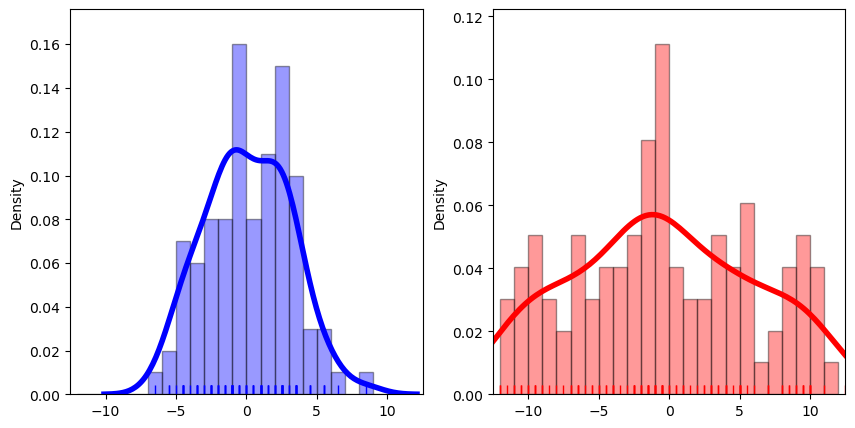

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.distplot(nnloverallmid, ax = axes[0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(nnloverallend, ax = axes[1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[1].set_xlim(xmin = -12.5, xmax = 12.5)

Normal v. Beam Low Runs

In [33]:
from copy import deepcopy as dc
x = open("b and normal low runs.txt", "r")
bnlgame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            bnlgame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(bnlgame)

100

In [34]:
bnlsummary = {}
for iter in bnlgame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = bnlgame[iter][len(bnlgame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in bnlgame[iter]:

        currboard = bnlgame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    bnlsummary[iter] = [bnlgame[iter][gamestart][:8], bnlgame[iter][gamemid][:8], bnlgame[iter][gameend][:8]]

[-2, -2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 2, 0, 0, 0, 0, 0, 0, -1, 0, -2, 0, 0]
30
[0, 0, 0, 0, -1, -2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
21
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0]
29
[0, 0, 0, 1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2]
30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2]
23
[0, 0, 0, -2, -1, -2, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, -1, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0]
27
[-2, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24
[0, 0, 0, 0, 0, -2, 0, 0, 0, 0, -2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]
30
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2]
30
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -2, 0, 1, 0, 0, 0, 1, 0, 1, 

In [35]:
bnloverallstart = []
bnloverallmid = []
bnloverallend = []

for iter in bnlgame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(bnlsummary[iter][num][row][1]), int(bnlsummary[iter][num][row][3]), int(bnlsummary[iter][num][row][5]), int(bnlsummary[iter][num][row][7])]
            else:
                pos = pos + [int(bnlsummary[iter][num][row][0]), int(bnlsummary[iter][num][row][2]), int(bnlsummary[iter][num][row][4]), int(bnlsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            bnloverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            bnloverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            bnloverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 7 1 8 1 -1.0
2: 2 1 2 3 -3.0

0: 12 0 12 0 0.0
1: 10 1 8 0 3.5
2: 7 0 2 1 3.5

0: 12 0 12 0 0.0
1: 8 1 6 0 3.5
2: 5 1 0 0 6.5

0: 12 0 12 0 0.0
1: 9 0 6 0 3.0
2: 4 1 1 1 3.0

0: 12 0 12 0 0.0
1: 7 1 7 0 1.5
2: 7 1 0 0 8.5

0: 12 0 12 0 0.0
1: 7 0 9 1 -3.5
2: 0 0 7 2 -10.0

0: 12 0 12 0 0.0
1: 9 0 10 0 -1.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 7 0 7 0 0.0
2: 1 3 0 2 2.5

0: 12 0 12 0 0.0
1: 6 0 6 0 0.0
2: 2 2 2 0 3.0

0: 12 0 12 0 0.0
1: 8 1 4 0 5.5
2: 5 1 0 1 5.0

0: 12 0 12 0 0.0
1: 9 2 4 0 8.0
2: 9 2 0 0 12.0

0: 12 0 12 0 0.0
1: 6 0 8 1 -3.5
2: 3 2 5 1 -0.5

0: 12 0 12 0 0.0
1: 8 0 9 0 -1.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 6 0 9 1 -4.5
2: 0 0 5 2 -8.0

0: 12 0 12 0 0.0
1: 7 0 9 1 -3.5
2: 0 0 7 2 -10.0

0: 12 0 12 0 0.0
1: 9 0 7 0 2.0
2: 5 1 2 0 4.5

0: 12 0 12 0 0.0
1: 8 0 8 0 0.0
2: 5 2 0 0 8.0

0: 12 0 12 0 0.0
1: 7 0 11 0 -4.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 7 0 8 1 -2.5
2: 0 0 7 2 -10.0

0: 12 0 12 0 0.0
1: 9 1 8 0 2.5
2: 6 1 3 0 4.5

0: 12 0 12 0 0.

In [36]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=bnloverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=bnloverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Beam MCTS against Normal MCTS", width=750, height=400)

fig.show()

print(np.mean(bnloverallmid))
print(np.mean(bnloverallend))

0.68
0.995


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\129953891.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\129953891.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




(-12.5, 12.5)

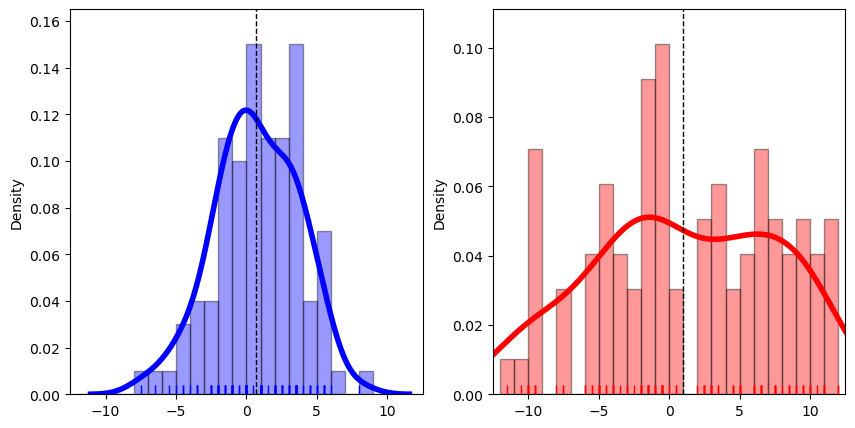

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.distplot(bnloverallmid, ax = axes[0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[0].axvline(np.mean(bnloverallmid), color='k', linestyle='dashed', linewidth=1)

axes[0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(bnloverallend, ax = axes[1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[1].axvline(np.mean(bnloverallend), color='k', linestyle='dashed', linewidth=1)

axes[1].set_xlim(xmin = -12.5, xmax = 12.5)

Normal v. Iterative Deepening Low Runs

In [45]:
from copy import deepcopy as dc
x = open("id and normal low runs.txt", "r")
idnlgame = {}
numpos = {}
pos = []
gamenum = 1
posnum = 1

for line in x.readlines():

    if not (line == "\n"):

        if line == "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n":
            idnlgame[gamenum] = dc(numpos)
            numpos = {}
            gamenum += 1
            posnum = 1
        
        elif line == "############\n":
            numpos[posnum] = dc(pos)
            pos = []
            posnum += 1

        else:
            pos.append(line.replace("-", "0").replace("01", "-1").replace("02", "-2").split())

x.close()
len(idnlgame)

100

In [46]:
idnlsummary = {}
for iter in idnlgame:

    gamestart = 1
    gameend = 0

    gameendpawns = []
    gameendkings = []
    gameendepawns = []
    gameendekings = []

    pos = []
    endboard = idnlgame[iter][len(idnlgame[iter])]
    for row in range(8):
        if row % 2 == 0:
            pos = pos + [int(endboard[row][1]), int(endboard[row][3]), int(endboard[row][5]), int(endboard[row][7])]
        else:
            pos = pos + [int(endboard[row][0]), int(endboard[row][2]), int(endboard[row][4]), int(endboard[row][6])]
    
    print(pos)

    gameboard = checkers(position = pos)
    gameboard.updateLocation()
    gameendpawns, gameendkings, gameendepawns, gameendekings = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

    for board in idnlgame[iter]:

        currboard = idnlgame[iter][board]

        gameend += 1

        pos = []
        for row in range(8):

            if row % 2 == 0:
                pos = pos + [int(currboard[row][1]), int(currboard[row][3]), int(currboard[row][5]), int(currboard[row][7])]
            else:
                pos = pos + [int(currboard[row][0]), int(currboard[row][2]), int(currboard[row][4]), int(currboard[row][6])]

        gameboard = checkers(position = pos)
        gameboard.updateLocation()

        if len(gameboard.pawns) == gameendpawns and len(gameboard.kings) == gameendkings and len(gameboard.epawns) == gameendepawns and len(gameboard.ekings) == gameendekings:
            
            break

    gamemid = round((gamestart + gameend)/2)

    print(gameend)

    idnlsummary[iter] = [idnlgame[iter][gamestart][:8], idnlgame[iter][gamemid][:8], idnlgame[iter][gameend][:8]]

[0, 0, 0, -2, -1, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
23
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2]
18
[-2, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
30
[-2, 0, 0, 0, -1, 0, 0, 0, -2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
28
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -2, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22
[-2, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25
[0, 0, 0, 0, 0, 0, 0, 0, -1, -2, -1, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
23
[-2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2]
26
[0, 0, 0, 0, 0, -2, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1

In [47]:
idnloverallstart = []
idnloverallmid = []
idnloverallend = []

for iter in idnlgame:
    
    for num in range(3):

        pos = []
        for row in range(8):
            if row % 2 == 0:
                pos = pos + [int(idnlsummary[iter][num][row][1]), int(idnlsummary[iter][num][row][3]), int(idnlsummary[iter][num][row][5]), int(idnlsummary[iter][num][row][7])]
            else:
                pos = pos + [int(idnlsummary[iter][num][row][0]), int(idnlsummary[iter][num][row][2]), int(idnlsummary[iter][num][row][4]), int(idnlsummary[iter][num][row][6])]
            
        gameboard = checkers(position = pos)
        gameboard.updateLocation()
        pawn, king, epawn, eking = len(gameboard.pawns), len(gameboard.kings), len(gameboard.epawns), len(gameboard.ekings)

        if num == 0:
            idnloverallstart.append(pawn+1.5*king-epawn-1.5*eking)
        elif num == 1:
            idnloverallmid.append(pawn+1.5*king-epawn-1.5*eking)
        else:
            idnloverallend.append(pawn+1.5*king-epawn-1.5*eking)

        print(str(num) + ": " + str(pawn) + " " + str(king) + " " + str(epawn) + " " + str(eking) + " " + str(pawn+1.5*king-epawn-1.5*eking))

    print()

0: 12 0 12 0 0.0
1: 7 0 10 0 -3.0
2: 0 0 9 1 -10.5

0: 12 0 12 0 0.0
1: 10 1 8 0 3.5
2: 7 3 0 0 11.5

0: 12 0 12 0 0.0
1: 6 0 9 1 -4.5
2: 0 2 5 1 -3.5

0: 12 0 12 0 0.0
1: 10 1 6 0 5.5
2: 7 1 1 2 4.5

0: 12 0 12 0 0.0
1: 9 0 10 0 -1.0
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 5 0 8 1 -4.5
2: 0 0 6 1 -7.5

0: 12 0 12 0 0.0
1: 6 0 9 1 -4.5
2: 0 0 8 1 -9.5

0: 12 0 12 0 0.0
1: 5 1 9 1 -4.0
2: 0 0 5 1 -6.5

0: 12 0 12 0 0.0
1: 9 1 9 0 1.5
2: 4 2 0 1 5.5

0: 12 0 12 0 0.0
1: 9 0 10 1 -2.5
2: 6 1 2 1 4.0

0: 12 0 12 0 0.0
1: 9 1 8 0 2.5
2: 7 2 0 0 10.0

0: 12 0 12 0 0.0
1: 6 0 9 0 -3.0
2: 0 0 7 1 -8.5

0: 12 0 12 0 0.0
1: 9 0 7 0 2.0
2: 8 0 0 1 6.5

0: 12 0 12 0 0.0
1: 5 1 7 1 -2.0
2: 1 2 3 2 -2.0

0: 12 0 12 0 0.0
1: 9 0 8 0 1.0
2: 1 4 1 1 4.5

0: 12 0 12 0 0.0
1: 6 1 7 0 0.5
2: 0 0 5 1 -6.5

0: 12 0 12 0 0.0
1: 6 0 9 1 -4.5
2: 1 2 6 1 -3.5

0: 12 0 12 0 0.0
1: 6 0 8 1 -3.5
2: 0 0 7 1 -8.5

0: 12 0 12 0 0.0
1: 6 0 9 1 -4.5
2: 3 0 6 1 -4.5

0: 12 0 12 0 0.0
1: 7 1 6 1 1.0
2: 2 2 1 2 1.0

0: 12 0 

In [48]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=idnloverallmid, name = "Middle Game Statistics"), row=1, col=1)
fig.add_trace(go.Histogram(x=idnloverallend, name = "End Game Statistics"), row=1, col=1)

fig.update_xaxes(title="Weighted Score", row=1, col=1)
fig.update_yaxes(title="Number of Games", row=1, col=1)

fig.update_layout(title_text="Performance of Beam MCTS against Normal MCTS", width=750, height=400)

fig.show()

print(np.mean(idnloverallmid))
print(np.mean(idnloverallend))

-0.165
-0.215


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\3039098799.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\3039098799.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\3039098799.py:27: UserWarning:



`distplot` 

(-12.5, 12.5)

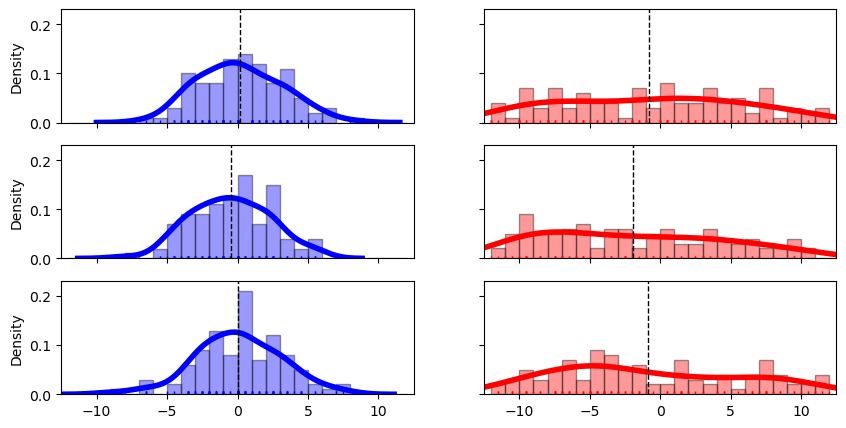

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10,5))

sns.distplot(nnoverallmid, ax = axes[0,0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[0,0].axvline(np.mean(nnoverallmid), color='k', linestyle='dashed', linewidth=1)

axes[0,0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(nnoverallend, ax = axes[0,1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[0,1].axvline(np.mean(nnoverallend), color='k', linestyle='dashed', linewidth=1)
axes[0,1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(bnoverallmid, ax = axes[1,0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[1,0].axvline(np.mean(bnoverallmid), color='k', linestyle='dashed', linewidth=1)

axes[1,0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(bnoverallend, ax = axes[1,1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[1,1].axvline(np.mean(bnoverallend), color='k', linestyle='dashed', linewidth=1)
axes[1,1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(idnoverallmid, ax = axes[2,0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[2,0].axvline(np.mean(idnoverallmid), color='k', linestyle='dashed', linewidth=1)

axes[2,0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(idnoverallend, ax = axes[2,1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[2,1].axvline(np.mean(idnoverallend), color='k', linestyle='dashed', linewidth=1)
axes[2,1].set_xlim(xmin = -12.5, xmax = 12.5)


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\2512299362.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\2512299362.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thewa\AppData\Local\Temp\ipykernel_21052\2512299362.py:27: UserWarning:



`distplot` 

(-12.5, 12.5)

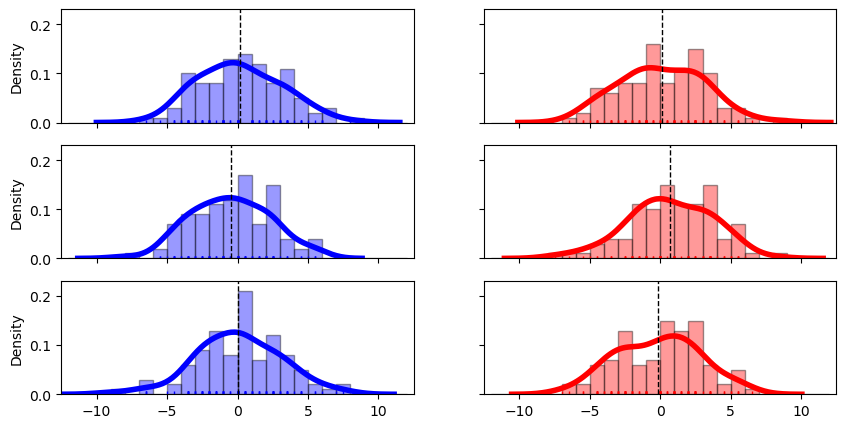

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10,5))

sns.distplot(nnoverallmid, ax = axes[0,0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[0,0].axvline(np.mean(nnoverallmid), color='k', linestyle='dashed', linewidth=1)

axes[0,0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(nnloverallmid, ax = axes[0,1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[0,1].axvline(np.mean(nnloverallmid), color='k', linestyle='dashed', linewidth=1)
axes[0,1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(bnoverallmid, ax = axes[1,0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[1,0].axvline(np.mean(bnoverallmid), color='k', linestyle='dashed', linewidth=1)

axes[1,0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(bnloverallmid, ax = axes[1,1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[1,1].axvline(np.mean(bnloverallmid), color='k', linestyle='dashed', linewidth=1)
axes[1,1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(idnoverallmid, ax = axes[2,0], hist=True, kde=True,
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[2,0].axvline(np.mean(idnoverallmid), color='k', linestyle='dashed', linewidth=1)

axes[2,0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.distplot(idnloverallmid, ax = axes[2,1], hist=True, kde=True, 
             bins = np.linspace(-12, 12, 25),
             rug = True,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

axes[2,1].axvline(np.mean(idnloverallmid), color='k', linestyle='dashed', linewidth=1)
axes[2,1].set_xlim(xmin = -12.5, xmax = 12.5)


Text(0.5, 0.98, 'Monte Carlo Tree Search 100 Rollout Short-Term Runs')

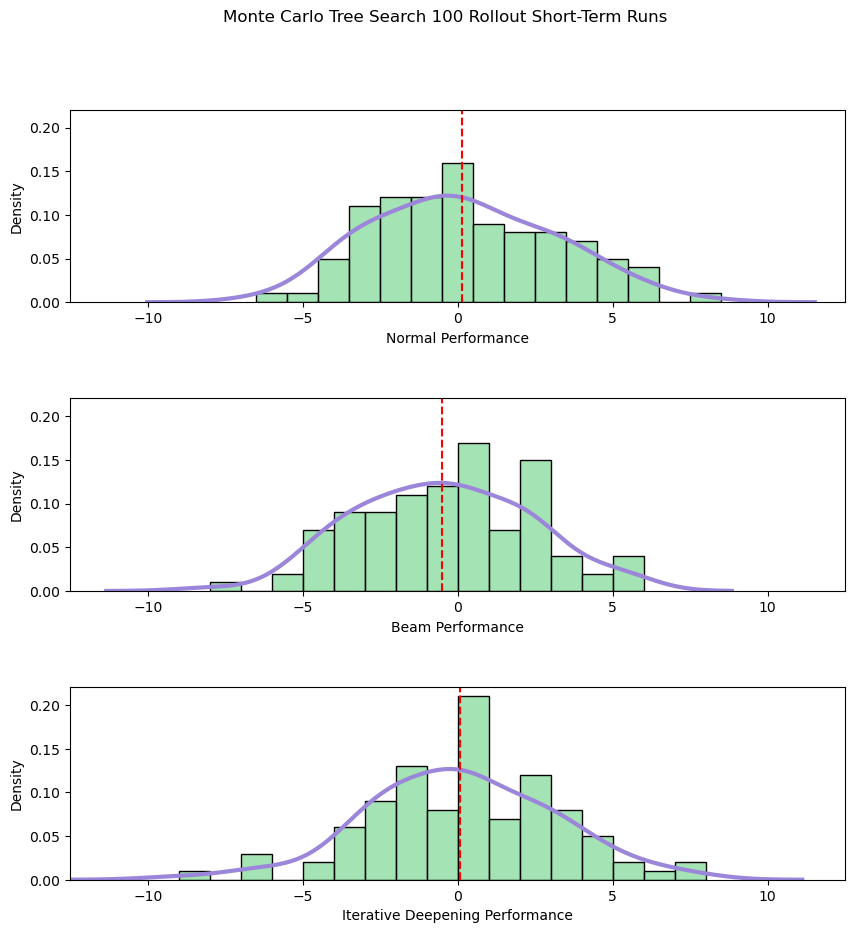

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, sharey=True, figsize=(10,10))

sns.histplot(nnoverallmid, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[0])
sns.kdeplot(nnoverallmid, color='#9b86da', ax=axes[0], linewidth=3)

axes[0].axvline(np.mean(nnoverallmid), color='red', linestyle='dashed', linewidth=1.5)
axes[0].set_xlabel("Normal Performance")
axes[0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(bnoverallmid, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[1])
sns.kdeplot(bnoverallmid, color='#9b86da', ax=axes[1], linewidth=3)

axes[1].axvline(np.mean(bnoverallmid), color='red', linestyle='dashed', linewidth=1.5)
axes[1].set_xlabel("Beam Performance")
axes[1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(idnoverallmid, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[2])
sns.kdeplot(idnoverallmid, color='#9b86da', ax=axes[2], linewidth=3)

axes[2].axvline(np.mean(idnoverallmid), color='red', linestyle='dashed', linewidth=1.5)
axes[2].set_xlabel("Iterative Deepening Performance")
axes[2].set_xlim(xmin = -12.5, xmax = 12.5)

fig.subplots_adjust(hspace = 0.5)
#fig.suptitle("Monte Carlo Tree Search 100 Rollout Short-Term Runs")

Text(0.5, 0.98, 'Monte Carlo Tree Search 100 Rollout Long-Term Runs')

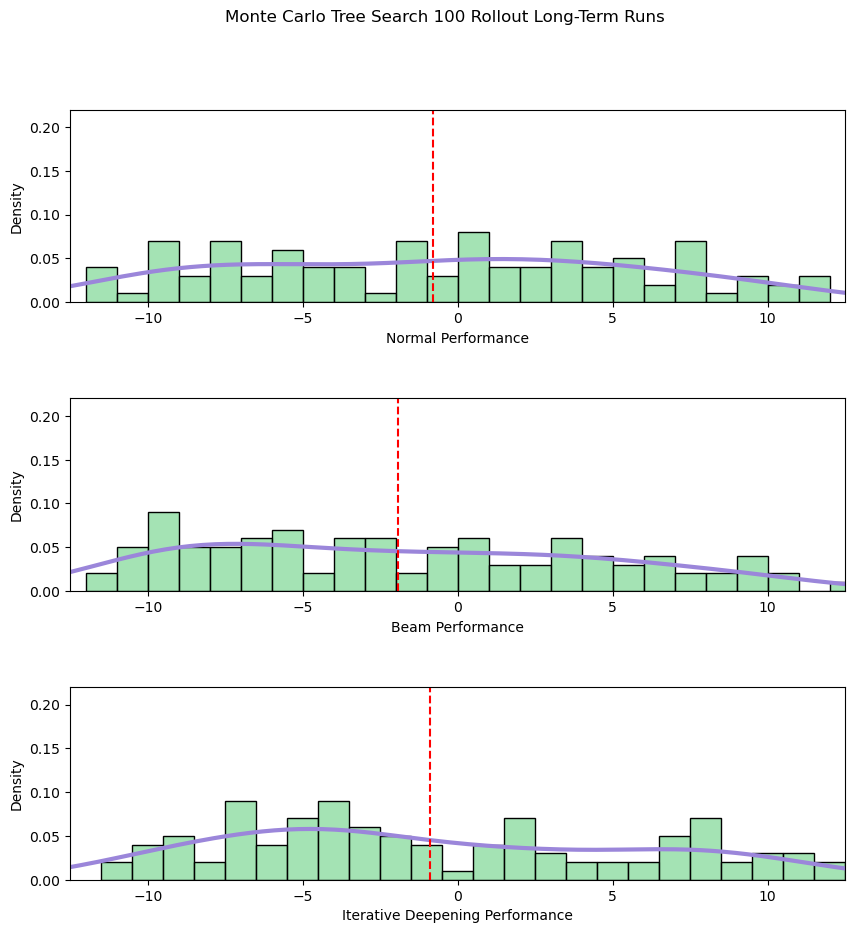

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, sharey=True, figsize=(10,10))

sns.histplot(nnoverallend, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[0])
sns.kdeplot(nnoverallend, color='#9b86da', ax=axes[0], linewidth=3)

axes[0].axvline(np.mean(nnoverallend), color='red', linestyle='dashed', linewidth=1.5)
axes[0].set_xlabel("Normal Performance")
axes[0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(bnoverallend, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[1])
sns.kdeplot(bnoverallend, color='#9b86da', ax=axes[1], linewidth=3)

axes[1].axvline(np.mean(bnoverallend), color='red', linestyle='dashed', linewidth=1.5)
axes[1].set_xlabel("Beam Performance")
axes[1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(idnoverallend, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[2])
sns.kdeplot(idnoverallend, color='#9b86da', ax=axes[2], linewidth=3)

axes[2].axvline(np.mean(idnoverallend), color='red', linestyle='dashed', linewidth=1.5)
axes[2].set_xlabel("Iterative Deepening Performance")
axes[2].set_xlim(xmin = -12.5, xmax = 12.5)

axes[2].set_ylim(ymax = .22)

fig.subplots_adjust(hspace = 0.5)
fig.suptitle("Monte Carlo Tree Search 100 Rollout Long-Term Runs")

Text(0.5, 0.98, 'Monte Carlo Tree Search 25 Rollout Short-Term Runs')

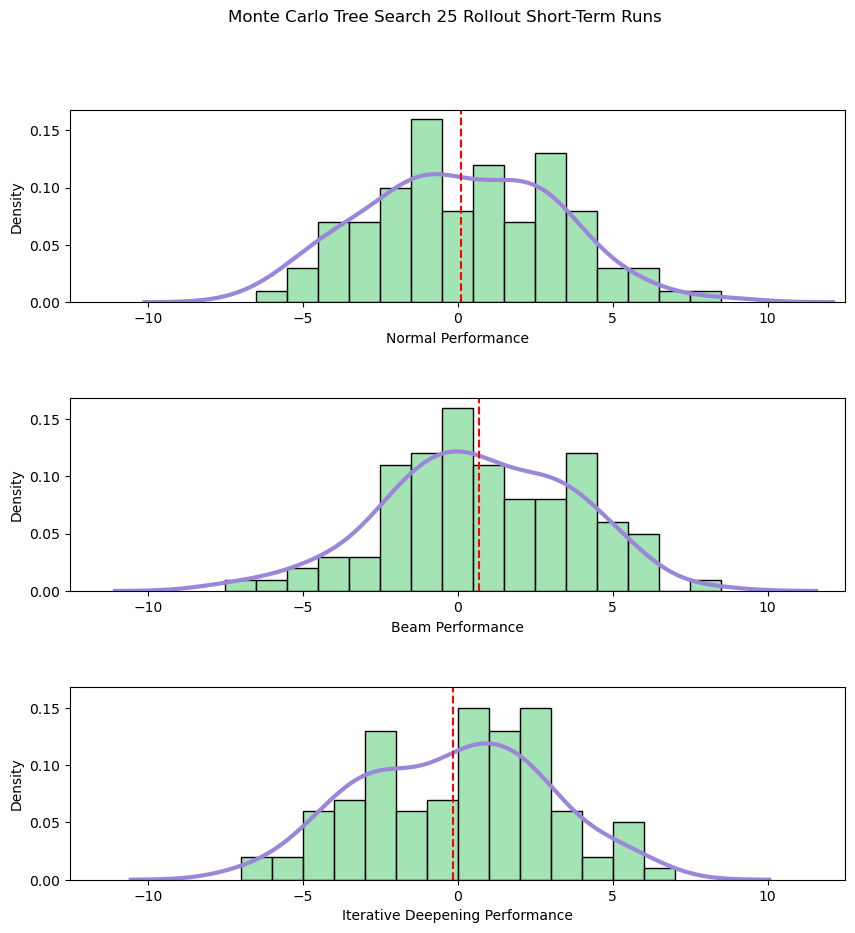

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, sharey=True, figsize=(10,10))

sns.histplot(nnloverallmid, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[0])
sns.kdeplot(nnloverallmid, color='#9b86da', ax=axes[0], linewidth=3)

axes[0].axvline(np.mean(nnloverallmid), color='red', linestyle='dashed', linewidth=1.5)
axes[0].set_xlabel("Normal Performance")
axes[0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(bnloverallmid, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[1])
sns.kdeplot(bnloverallmid, color='#9b86da', ax=axes[1], linewidth=3)

axes[1].axvline(np.mean(bnloverallmid), color='red', linestyle='dashed', linewidth=1.5)
axes[1].set_xlabel("Beam Performance")
axes[1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(idnloverallmid, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[2])
sns.kdeplot(idnloverallmid, color='#9b86da', ax=axes[2], linewidth=3)

axes[2].axvline(np.mean(idnloverallmid), color='red', linestyle='dashed', linewidth=1.5)
axes[2].set_xlabel("Iterative Deepening Performance")
axes[2].set_xlim(xmin = -12.5, xmax = 12.5)

fig.subplots_adjust(hspace = 0.5)
fig.suptitle("Monte Carlo Tree Search 25 Rollout Short-Term Runs")

Text(0.5, 0.98, 'Monte Carlo Tree Search 25 Rollout Short-Term Runs')

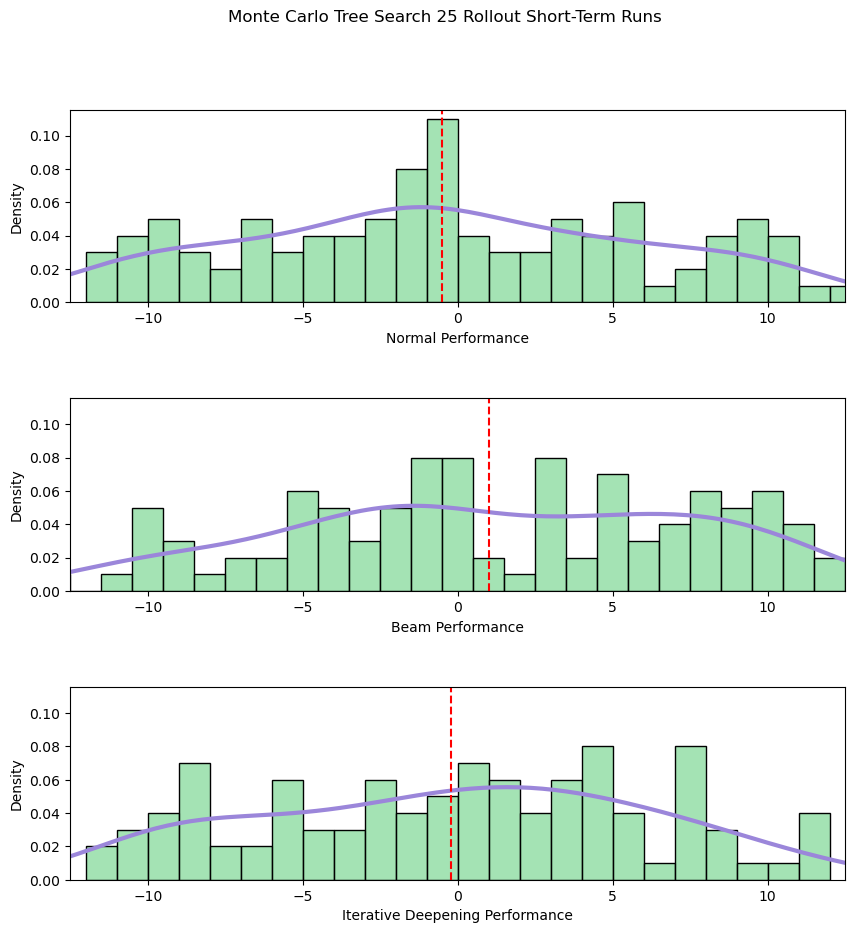

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, sharey=True, figsize=(10,10))

sns.histplot(nnloverallend, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[0])
sns.kdeplot(nnloverallend, color='#9b86da', ax=axes[0], linewidth=3)

axes[0].axvline(np.mean(nnloverallend), color='red', linestyle='dashed', linewidth=1.5)
axes[0].set_xlabel("Normal Performance")
axes[0].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(bnloverallend, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[1])
sns.kdeplot(bnloverallend, color='#9b86da', ax=axes[1], linewidth=3)

axes[1].axvline(np.mean(bnloverallend), color='red', linestyle='dashed', linewidth=1.5)
axes[1].set_xlabel("Beam Performance")
axes[1].set_xlim(xmin = -12.5, xmax = 12.5)

sns.histplot(idnloverallend, color = '#86da9b', binwidth = 1, linewidth = 1, bins = np.linspace(-12, 12, 25), kde=False, stat='density', ax=axes[2])
sns.kdeplot(idnloverallend, color='#9b86da', ax=axes[2], linewidth=3)

axes[2].axvline(np.mean(idnloverallend), color='red', linestyle='dashed', linewidth=1.5)
axes[2].set_xlabel("Iterative Deepening Performance")
axes[2].set_xlim(xmin = -12.5, xmax = 12.5)

fig.subplots_adjust(hspace = 0.5)
fig.suptitle("Monte Carlo Tree Search 25 Rollout Long-Term Runs")